## **BUSINESS UNDERSTANDING**

### You have been called for an interview in ABC company, a logistics and supply chain provider that aims to improve delivery efficiency by ensuring products are delivered on time. They would like to optimize their operations by eradicating delays in shipment whih has been impacting customer satisfaction and the operational cost. They would like you to identify the key factors, that influence product delivery.



###You are expected to Create a model to identify the key factors influencing product delivery delays and recommend strategies for improving delivery efficiency, reducing operational costs, and enhancing customer satisfaction.

### **Objective of the Analysis**
1. Identify the Key Factors impacting delivery timeliness.


2. Develop a predictive model to forecast whether shipments will reach their destinations on time.

3. Analyse the data to reduce delays and improve the overall customer experience.

4. Minimize financial losses associated with delayed shipments

### **Data Source and description**

The dataset used was **E-Commerce Shipping Data** that was extracted from kaggle (https://www.kaggle.com/datasets/prachi13/customer-analytics).

The dataset used for model building contained 10999 observations of 12 variables.

The data contains the following information:

*   ID: ID Number of Customers.

*   Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
*   Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.

*   Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
*  Customer care calls: The number of calls made from enquiry for enquiry of the shipment.

*   Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).

*   Cost of the product: Cost of the Product in US Dollars.
*   Prior purchases: The Number of Prior Purchase.

*   Product importance: The company has categorized the product in the various parameter such as low, medium, high.
*   Gender: Male and Female.
*   Discount offered: Discount offered on that specific product.
*   Weight in gms: It is the weight in grams.
*   Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


## Importing libraries Packages and Data loading

In [2]:
# Import the packages
# eda
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

#split
from sklearn.model_selection import train_test_split


#Scaling
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, r2_score, confusion_matrix, classification_report, accuracy_score
from sklearn import metrics

#sklearn algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv('/content/Train.csv')

## **Data Exploration**



In [3]:
data.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# Shape of the data
print(data.shape) # the data set has 3333 rows and 21 columns
print(" ")
print(data.columns)
print(" ")
print(data.info())
print(" ")
# checking null values
print(data.isnull().sum()) # Dataset has no null value
print(" ")
# Check for duplicate values
print(f"The data Duplicate are {data.duplicated().sum()}")

(10999, 12)
 
Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_

## **Data Cleaning and Preparation**

In [5]:
# drop the columns that are not significant
data.drop(['ID','Gender'], axis=1, inplace=True)
data.shape


(10999, 10)

In [6]:
# select only numeric columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Define the columns to transform
columns_to_transform = ['Weight_in_gms', 'Discount_offered', 'Cost_of_the_Product'] # Add the column names to be transformed

# check for outliers
# Apply log1p to all selected columns
for column in columns_to_transform:
    data[f'{column}_log'] = np.log1p(data[column])
data.drop(columns_to_transform, axis=1, inplace=True) # Drop transformed columns
print(data.shape)
print(" ")
print(data.info())

(10999, 10)
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Warehouse_block          10999 non-null  object 
 1   Mode_of_Shipment         10999 non-null  object 
 2   Customer_care_calls      10999 non-null  int64  
 3   Customer_rating          10999 non-null  int64  
 4   Prior_purchases          10999 non-null  int64  
 5   Product_importance       10999 non-null  object 
 6   Reached.on.Time_Y.N      10999 non-null  int64  
 7   Weight_in_gms_log        10999 non-null  float64
 8   Discount_offered_log     10999 non-null  float64
 9   Cost_of_the_Product_log  10999 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 859.4+ KB
None


## **Data Preprocessing**

### 1. OneHotEncoding

In [7]:
# perform a one hot encoding to the columns
column_encodings = data[['Mode_of_Shipment', 'Product_importance']].copy()

ohe = OneHotEncoder(drop="first", sparse_output=False)

ohe.fit(column_encodings)

transformed_data = ohe.transform(column_encodings)


# Get all feature names from the encoder
all_feature_names = ohe.get_feature_names_out(input_features=['Mode_of_Shipment', 'Product_importance'])

# Create the DataFrame with the correct column names
column_encodings_ohe = pd.DataFrame(
    data=transformed_data,
    columns=all_feature_names  # Use all feature names here
)
column_encodings_ohe

# concat with the main data
data1 = pd.concat([data, column_encodings_ohe], axis=1)
print(data1.shape)
data1.head()

(10999, 14)


,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Reached.on.Time_Y.N,Weight_in_gms_log,Discount_offered_log,Cost_of_the_Product_log,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
0,D,Flight,4,2,3,low,1,7.118016,3.806662,5.181784,0.0,0.0,1.0,0.0
1,F,Flight,4,5,2,low,1,8.035603,4.094345,5.379897,0.0,0.0,1.0,0.0
2,A,Flight,2,2,4,low,1,8.124151,3.891820,5.214936,0.0,0.0,1.0,0.0
3,B,Flight,3,3,4,medium,1,7.071573,2.397895,5.176150,0.0,0.0,0.0,1.0
4,C,Flight,2,2,3,medium,1,7.818028,3.850148,5.220356,0.0,0.0,0.0,1.0


In [8]:
numeric_columns = data1.select_dtypes(include=['number'])
numeric_columns.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Reached.on.Time_Y.N,Weight_in_gms_log,Discount_offered_log,Cost_of_the_Product_log,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
0,4,2,3,1,7.118016,3.806662,5.181784,0.0,0.0,1.0,0.0
1,4,5,2,1,8.035603,4.094345,5.379897,0.0,0.0,1.0,0.0
2,2,2,4,1,8.124151,3.891820,5.214936,0.0,0.0,1.0,0.0
3,3,3,4,1,7.071573,2.397895,5.176150,0.0,0.0,0.0,1.0
4,2,2,3,1,7.818028,3.850148,5.220356,0.0,0.0,0.0,1.0


### 2. Test-Train test

In [9]:
y = data1[['Reached.on.Time_Y.N']]
X = data1.drop(['Reached.on.Time_Y.N', 'Warehouse_block','Mode_of_Shipment','Product_importance'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8799, 10), (2200, 10), (8799, 1), (2200, 1))

### 3. Scaling

In [10]:
# Instantiate a scaler object
scaler = StandardScaler()

# Fit the scaler on X_train and transform X_train
X_train_scaled = scaler.fit_transform(X_train)

# Transform X_test
X_test_scaled = scaler.transform(X_test)

## **Exploratory Data Analysis (EDA)**

In [11]:
# Data Overview
data1.describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Reached.on.Time_Y.N,Weight_in_gms_log,Discount_offered_log,Cost_of_the_Product_log,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,3.567597,0.596691,8.064237,2.188173,5.324656,0.160015,0.678425,0.481589,0.432221
std,1.141490,1.413603,1.522860,0.490584,0.556824,0.931800,0.242965,0.366636,0.467102,0.499684,0.495407
min,2.000000,1.000000,2.000000,0.000000,6.909753,0.693147,4.574711,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,3.000000,0.000000,7.517793,1.609438,5.135798,0.000000,0.000000,0.000000,0.000000
50%,4.000000,3.000000,3.000000,1.000000,8.330864,2.079442,5.370638,0.000000,1.000000,0.000000,0.000000
75%,5.000000,4.000000,4.000000,1.000000,8.527342,2.397895,5.529429,0.000000,1.000000,1.000000,1.000000
max,7.000000,5.000000,10.000000,1.000000,8.967887,4.189655,5.739793,1.000000,1.000000,1.000000,1.000000


In [13]:
# Change label 0 with 'On time' and 1 with 'Not on time'
# 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time
data['Reached.on.Time_Y.N'] = data['Reached.on.Time_Y.N'].replace({0:'On time', 1:'Not On time'})

data['Reached.on.Time_Y.N'].value_counts()
#print(data['Reached.on.Time_Y.N'].value_counts())
print(" ")
# percentage of churn
print(data['Reached.on.Time_Y.N'].value_counts(normalize=True)*100)
print(" ")
print("Majority of the products represented by 59.66% are not delivered on time")

 
Reached.on.Time_Y.N
Not On time    59.669061
On time        40.330939
Name: proportion, dtype: float64
 
Majority of the products represented by 59.66% are not delivered on time


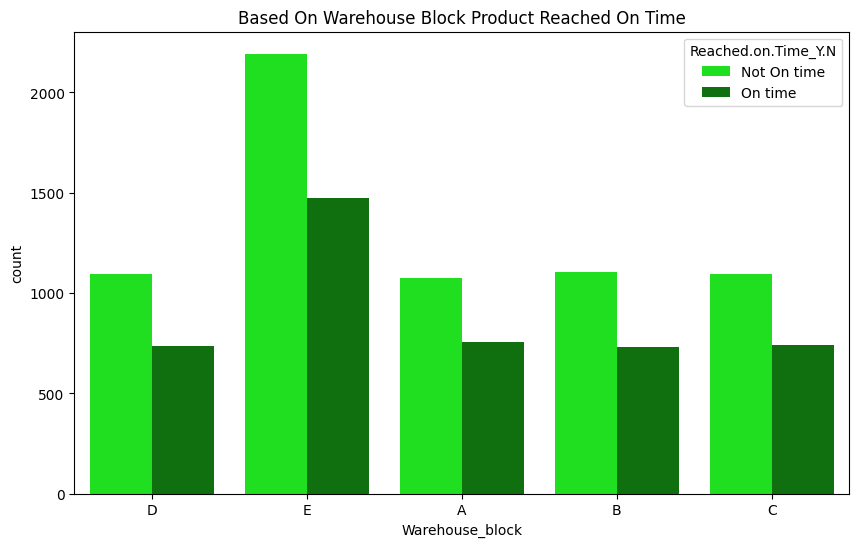

 
There is no relationship between delivering on time and the warehouse block


In [14]:
data['Warehouse_block'] = data['Warehouse_block'].replace({'F':'E'})

plt.figure(figsize=(10, 6))
sns.countplot(x='Warehouse_block', hue='Reached.on.Time_Y.N', data=data, palette=['#00FF00', '#008000'])

plt.title('Based On Warehouse Block Product Reached On Time')
plt.show()
print(" ")
print("There is no relationship between delivering on time and the warehouse block")

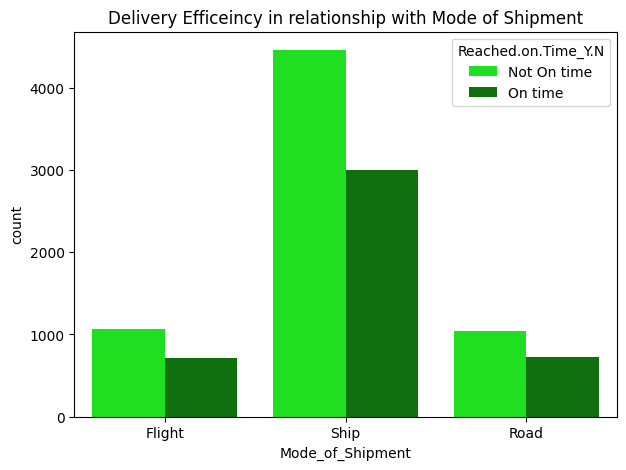

 
There is no relationship between delivering efficiency and the mode of shipment. The figure shows that majority of the products are shipped


In [15]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=data, x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', palette=['#00FF00', '#008000'])

plt.title('Delivery Efficeincy in relationship with Mode of Shipment')
plt.show()
print(" ")
print("There is no relationship between delivering efficiency and the mode of shipment. The figure shows that majority of the products are shipped")

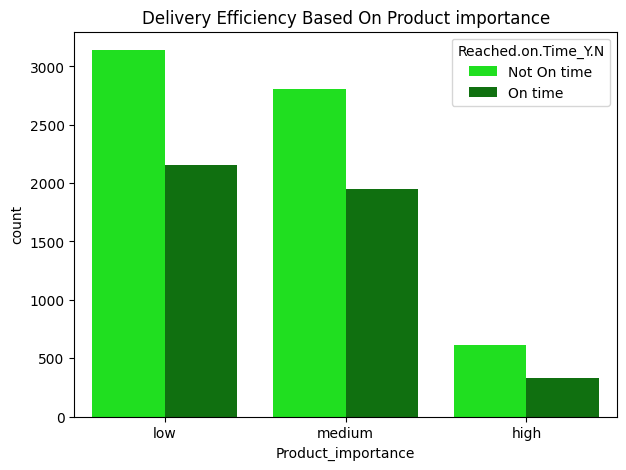

 
There is no relationship between delivering efficiency and the product importance. The figure shows that majority of the products have a low importance


In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=data, palette=['#00FF00', '#008000'])

plt.title('Delivery Efficiency Based On Product importance')
plt.show()
print(" ")
print("There is no relationship between delivering efficiency and the product importance. The figure shows that majority of the products have a low importance")

In [17]:
# 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time
data1['Reached.on.Time_Y.N'] = data1['Reached.on.Time_Y.N'].replace({'On time': 0, 'Not On time': 1})

# do a correlation between the numerical_cols with y = Reached.on.Time_Y.N
# Include only numeric columns in the correlation calculation
data1.corr(numeric_only=True)['Reached.on.Time_Y.N'].sort_values(ascending=False)
# data1 is the encoded data

,Reached.on.Time_Y.N
Reached.on.Time_Y.N,1.000000
Discount_offered_log,0.379290
Customer_rating,0.013119
Mode_of_Shipment_Ship,0.002577
Product_importance_low,-0.007667
Mode_of_Shipment_Road,-0.007671
Product_importance_medium,-0.011099
Prior_purchases,-0.055515
Customer_care_calls,-0.067126
Cost_of_the_Product_log,-0.072103


In [18]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Warehouse_block            10999 non-null  object 
 1   Mode_of_Shipment           10999 non-null  object 
 2   Customer_care_calls        10999 non-null  int64  
 3   Customer_rating            10999 non-null  int64  
 4   Prior_purchases            10999 non-null  int64  
 5   Product_importance         10999 non-null  object 
 6   Reached.on.Time_Y.N        10999 non-null  int64  
 7   Weight_in_gms_log          10999 non-null  float64
 8   Discount_offered_log       10999 non-null  float64
 9   Cost_of_the_Product_log    10999 non-null  float64
 10  Mode_of_Shipment_Road      10999 non-null  float64
 11  Mode_of_Shipment_Ship      10999 non-null  float64
 12  Product_importance_low     10999 non-null  float64
 13  Product_importance_medium  10999 non-null  flo

<ipython-input-19-e7e49acc4207>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Cost_of_the_Product_log']);


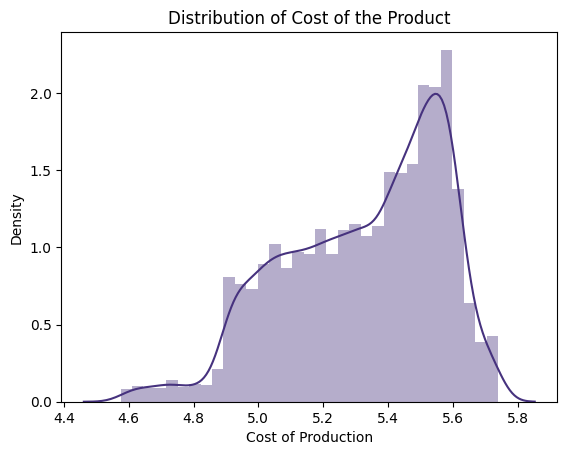

<Figure size 1500x800 with 0 Axes>

 
The distribution is slightly skewed to the left (negatively skewed). This suggests that most data points lie toward the higher range of the cost, while there are fewer observations on the lower side.
The highest peak of the KDE curve occurs around 5.5. This is the mode, indicating that most observations are concentrated around this value.
The data spans values roughly between 4.4 and 5.8, indicating the range of the cost of production.


In [19]:
# identifying the variables present in the Cost_of_the_Product

palette = sns.color_palette("viridis")

sns.set_palette(palette)

sns.distplot(data['Cost_of_the_Product_log']);

plt.xlabel('Cost of Production')
plt.ylabel('Density')
plt.title('Distribution of Cost of the Product')

plt.figure(figsize = (15, 8))
plt.show()
print(" ")
print("The distribution is slightly skewed to the left (negatively skewed). This suggests that most data points lie toward the higher range of the cost, while there are fewer observations on the lower side.")
print("The highest peak of the KDE curve occurs around 5.5. This is the mode, indicating that most observations are concentrated around this value.")
print("The data spans values roughly between 4.4 and 5.8, indicating the range of the cost of production.")

<ipython-input-20-baa2cf0339be>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Discount_offered_log']);


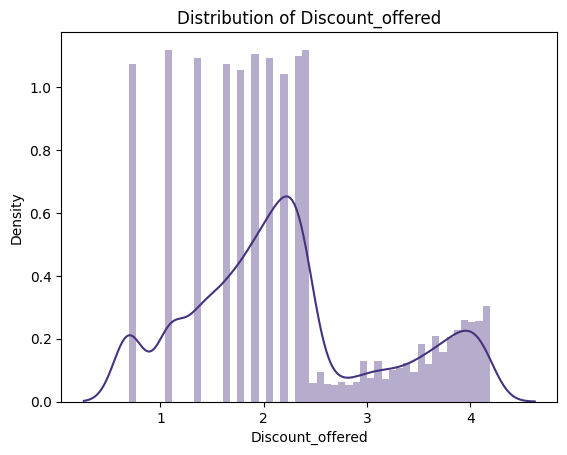

<Figure size 1500x800 with 0 Axes>

In [20]:
# identifying the variables present in the Discount_offered

palette = sns.color_palette("viridis")

sns.set_palette(palette)

sns.distplot(data['Discount_offered_log']);

plt.xlabel('Discount_offered')
plt.ylabel('Density')
plt.title('Distribution of Discount_offered')

plt.figure(figsize = (15, 8))
plt.show()

<ipython-input-21-95dc1bab8da7>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Weight_in_gms_log']);


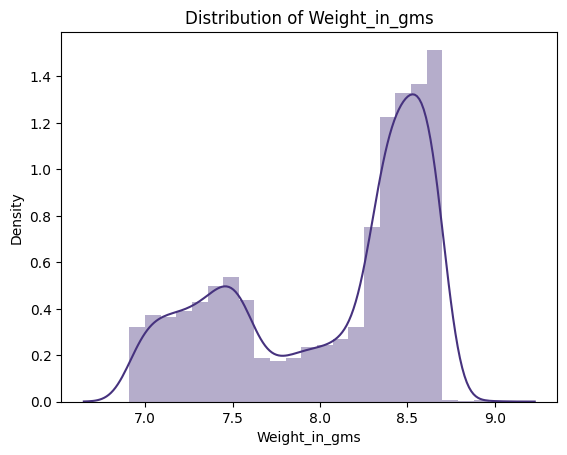

<Figure size 1500x800 with 0 Axes>

In [21]:
# identifying the variables present in the Weight_in_gms

palette = sns.color_palette("viridis")

sns.set_palette(palette)

sns.distplot(data['Weight_in_gms_log']);

plt.xlabel('Weight_in_gms')
plt.ylabel('Density')
plt.title('Distribution of Weight_in_gms')

plt.figure(figsize = (15, 8))
plt.show()

In [ ]:
# # ROC Curve
# plt.figure(figsize=(8, 6))
# fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
# plt.plot(fpr, tpr, label='Decision Tree (AUC = ' + str(round(roc_auc_score(y_test, y_pred_proba), 2)) + ')')
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curve (After SMOTE)')
# plt.legend()
# plt.show()

In [ ]:
# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Cost_of_the_Product', 'Weight_in_gms']] = scaler.fit_transform(data[['Cost_of_the_Product', 'Weight_in_gms']])
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,-0.690722,3,low,F,44,-1.468240,1
1,2,F,Flight,4,5,0.120746,2,low,M,59,-0.333893,1
2,3,A,Flight,2,2,-0.565881,4,low,M,48,-0.159002,1
3,4,B,Flight,3,3,-0.711529,4,medium,M,10,-1.502484,1
4,5,C,Flight,2,2,-0.545074,3,medium,F,46,-0.703244,1


In [ ]:
sns.countplot(x='voice mail plan', hue='churn', data=data)
plt.show()

In [ ]:
# Descriptive analysis of numeric values
data.describe()

In [ ]:
drp = tele[['state','area code','phone number','international plan','voice mail plan','churn']]
X= tele.drop(drp,1)
y= tele.churn
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25)

## **Modeling**

1. Applying logistic regression to predict the Reached.on.Time_Y.N  variable.

2. Also measuring the accuracy score of the algorithm.

### Preparing the data for Modeling

In [ ]:
# to check the continous variable
for col in ['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']:
    print(f"{col}: {data[col].nunique()} unique values")
# Variables with a large number of unique values are continous

Customer_care_calls: 6 unique values
Customer_rating: 5 unique values
Cost_of_the_Product: 215 unique values
Discount_offered: 65 unique values
Weight_in_gms: 4034 unique values


In [ ]:
continuous = ['Weight_in_gms_log', 'Discount_offered_log', 'Cost_of_the_Product_log']
categoricals = ['Customer_care_calls', 'Customer_rating', 'Mode_of_Shipment_Road','Mode_of_Shipment_Ship', 'Prior_purchases', 'Product_importance_low','Product_importance_medium']
 #['Customer_care_calls', 'Customer_rating', 'Prior_purchases']

### Logistic Regression

In [ ]:
model1 = LogisticRegression(solver='liblinear', random_state=0)
model1.fit(X_train,y_train)

# model prediction
y_pred_train1 = model1.predict(X_train)
y_pred_test1 = model1.predict(X_test)

# model evaluation

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)


print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error: ', test_mse)
print('Logistic regression score =',round(metrics.accuracy_score(y_test, y_pred_test1)*100,2))
print(" ")
print(classification_report(y_test, y_pred_test1))

Logistic regression score = 62.45
 
              precision    recall  f1-score   support

           0       0.56      0.36      0.44       895
           1       0.65      0.80      0.72      1305

    accuracy                           0.62      2200
   macro avg       0.60      0.58      0.58      2200
weighted avg       0.61      0.62      0.60      2200



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


 Evaluate the Model Performance

In [ ]:
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

### Decision Tree

In [ ]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

# model prediction
y_pred = model2.predict(X_test)
print('Decision tree score =',round(metrics.accuracy_score(y_test, y_pred)*100,2))
print(" ")
print(classification_report(y_test, y_pred))

Decision tree score = 64.91
 
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       895
           1       0.70      0.71      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



### Random Forest

In [ ]:
# model prediction
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train, y_train)
# model prediction
y_pred = model3.predict(X_test)
print('Random forest score =',round(metrics.accuracy_score(y_test, y_pred)*100,2))
print(" ")
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random forest score = 67.09
 
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       895
           1       0.74      0.69      0.71      1305

    accuracy                           0.67      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.67      0.67      2200



In [ ]:
# Instantiate transformers
log_transformer = FunctionTransformer(np.log, validate=True)
ohe = OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Fit transformers
log_transformer.fit(X_train[continuous])
ohe.fit(X_train[categoricals])

OneHotEncoder(drop='first', sparse_output=False)

In [ ]:
# Transform training data
X_train = pd.concat([
    pd.DataFrame(log_transformer.transform(X_train[continuous]), index=X_train.index),
    pd.DataFrame(ohe.transform(X_train[categoricals]), index=X_train.index)
], axis=1)

# Transform test data
X_test = pd.concat([
    pd.DataFrame(log_transformer.transform(X_test[continuous]), index=X_test.index),
    pd.DataFrame(ohe.transform(X_test[categoricals]), index=X_test.index)
], axis=1)

In [ ]:
# Random Forest
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

yRFC_pred = RFC.predict(X_train)
yRFC_pred2 = RFC.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
print('Classification Report is: \n \n' , classification_report(y_train, yRFC_pred ))

print('The train accuracy score is:', accuracy_score(y_train, yRFC_pred)*100) # accuracy score

cm = confusion_matrix(y_train, yRFC_pred) # Confusion matrix
print('\n Confusion matrix \n \n', cm)

NameError: name 'classification_report' is not defined

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Logistic regression score =',round(metrics.accuracy_score(y_test, y_pred),2))

In [ ]:
# Find the correlation with SalePrice as y
df.corr()['SalePrice'].sort_values(ascending=False)

### REACH HERE

https://www.kaggle.com/code/arpitharavi/telecom-churn-notebook

